<a href="https://colab.research.google.com/github/Aman123307/Aman-Arora-123/blob/main/movie_genre_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GENRE CLASSIFICATION PROJECT

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
movies = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Used/movie_genre_classification_final.csv.crdownload')

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from scipy.sparse import hstack
from sklearn.preprocessing import MinMaxScaler


In [ ]:
movies.head()

,Title,Year,Director,Duration,Rating,Votes,Description,Language,Country,Budget_USD,BoxOffice_USD,Genre,Production_Company,Content_Rating,Lead_Actor,Num_Awards,Critic_Reviews
0,Winds of Fate 4,1980,R. Lee,167,4.1,182425,A touching love story with heartwarming moments.,Spanish,China,39979615,179936008,Romance,DreamWorks,R,Kangana Ranaut,8,229
1,Firestorm 11,2014,S. Chen,166,4.1,449351,A fast-paced thriller with intense action scenes.,Korean,China,116404774,802121619,Action,Netflix,R,Kangana Ranaut,20,466
2,Silent Echo 2,2016,A. Khan,170,4.1,363328,A fast-paced thriller with intense action scenes.,Korean,Japan,166261330,225526871,Action,Pixar,PG,Amitabh Bachchan,16,539
3,City Lights 4,1982,L. Zhang,170,9.9,62371,An emotional journey exploring complex charact...,Japanese,Japan,28861315,69813738,Drama,Netflix,NC-17,Natalie Portman,15,606
4,Broken Truth 1,1990,L. Zhang,91,5.3,4600,An imaginative world filled with magic and won...,Korean,USA,43890403,375136716,Fantasy,Studio Ghibli,PG,Chris Evans,6,330


In [ ]:
movies.shape

(50000, 17)

In [ ]:
numeric_description = movies.describe()
numeric_description

,Year,Duration,Rating,Votes,Budget_USD,BoxOffice_USD,Num_Awards,Critic_Reviews
count,50000.000000,50000.00000,50000.000000,50000.000000,5.000000e+04,5.000000e+04,50000.000000,50000.000000
mean,2001.562620,130.07312,6.926472,249699.050540,9.179143e+07,5.176063e+08,9.964440,500.176380
std,12.722539,29.11097,1.698758,144314.043032,5.823888e+07,2.880283e+08,6.066303,289.971792
min,1980.000000,80.00000,4.000000,516.000000,1.135566e+06,3.291117e+06,0.000000,0.000000
25%,1991.000000,105.00000,5.500000,124531.500000,4.389040e+07,2.590329e+08,5.000000,248.000000
50%,2002.000000,130.00000,6.900000,248582.000000,8.062480e+07,5.109973e+08,10.000000,500.000000
75%,2013.000000,155.00000,8.400000,374833.500000,1.475557e+08,7.704129e+08,15.000000,751.000000
max,2023.000000,180.00000,9.900000,499984.000000,1.984445e+08,9.925159e+08,20.000000,1000.000000


In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               50000 non-null  object 
 1   Year                50000 non-null  int64  
 2   Director            50000 non-null  object 
 3   Duration            50000 non-null  int64  
 4   Rating              50000 non-null  float64
 5   Votes               50000 non-null  int64  
 6   Description         50000 non-null  object 
 7   Language            50000 non-null  object 
 8   Country             50000 non-null  object 
 9   Budget_USD          50000 non-null  int64  
 10  BoxOffice_USD       50000 non-null  int64  
 11  Genre               50000 non-null  object 
 12  Production_Company  50000 non-null  object 
 13  Content_Rating      50000 non-null  object 
 14  Lead_Actor          50000 non-null  object 
 15  Num_Awards          50000 non-null  int64  
 16  Crit

In [ ]:
Null_value = movies.isnull().sum()
Null_value

,0
Title,0
Year,0
Director,0
Duration,0
Rating,0
Votes,0
Description,0
Language,0
Country,0
Budget_USD,0


In [ ]:
Duplicated_rows = movies.duplicated().sum()
Duplicated_rows

np.int64(0)

In [ ]:
# Count of unique values in target column 'Genre'
genre_distribution = movies['Genre'].value_counts()
genre_distribution

,count
Genre,
Horror,7260
Drama,7187
Romance,7169
Thriller,7118
Action,7107
Fantasy,7100
Comedy,7059


In [ ]:
# Count of unique values in  column 'Language'
Language_distribution = movies['Language'].value_counts()
Language_distribution

,count
Language,
Spanish,7243
Japanese,7195
French,7165
English,7139
Mandarin,7109
Korean,7091
Hindi,7058


# Data Visualisation

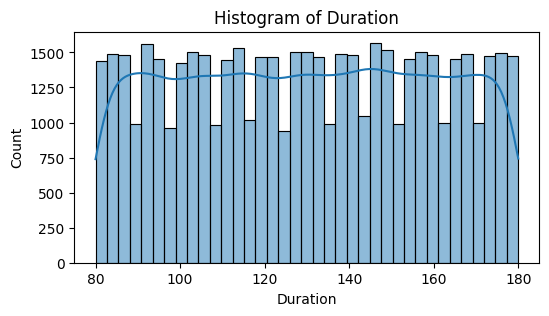

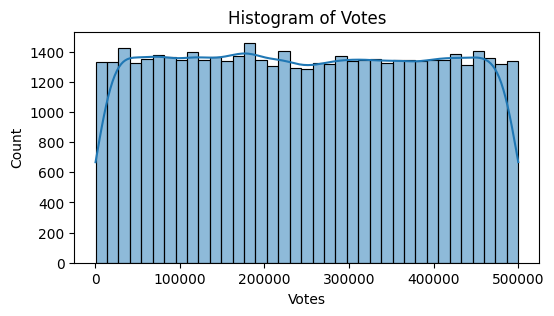

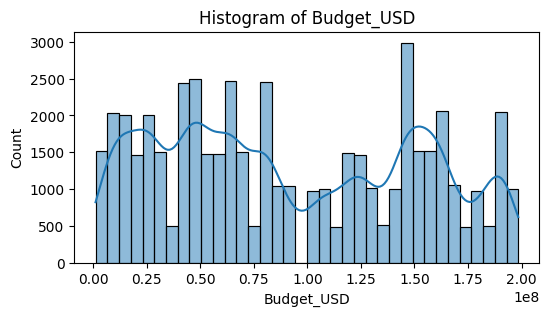

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in ['Duration', 'Votes', 'Budget_USD']:
    plt.figure(figsize=(6, 3))
    sns.histplot(movies[col], kde=True)
    plt.title(f"Histogram of {col}")
    plt.show()

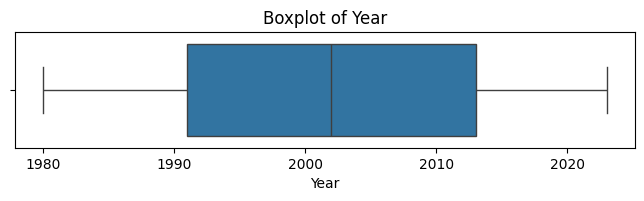

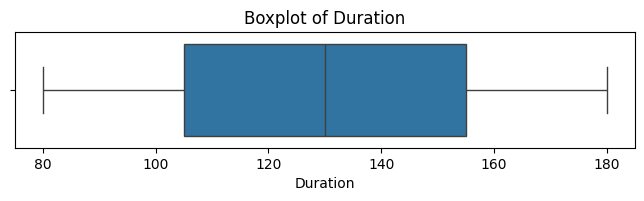

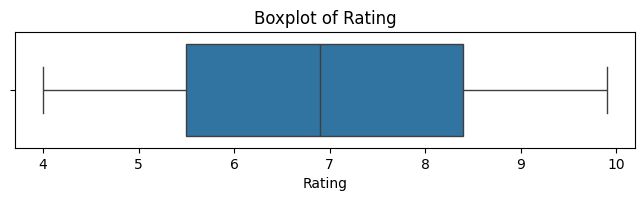

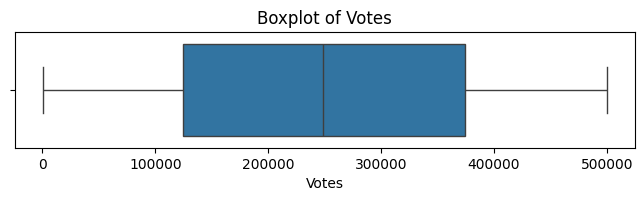

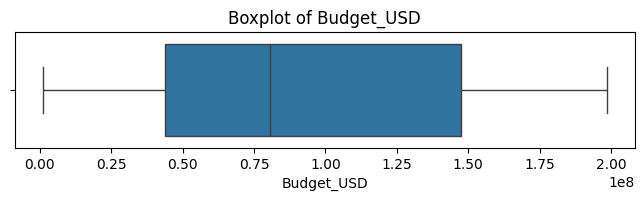

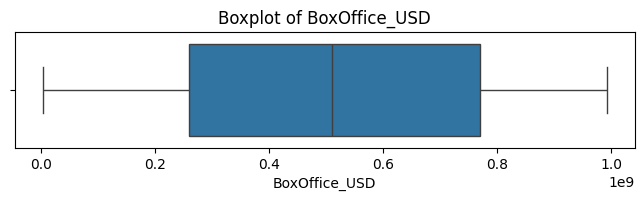

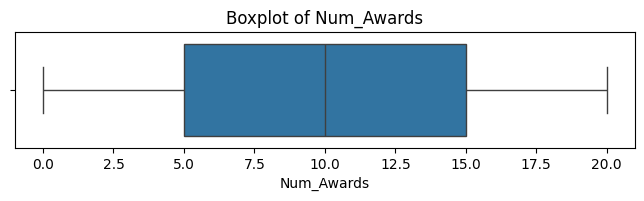

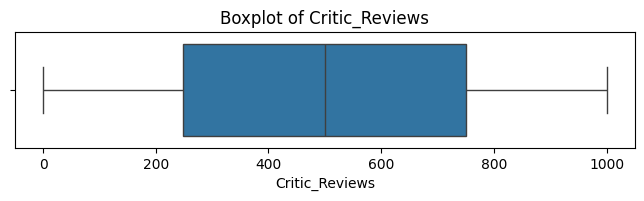

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns from the movies DataFrame
numeric_cols_names = movies.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols_names:
    plt.figure(figsize=(8, 1.5))
    sns.boxplot(x=movies[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

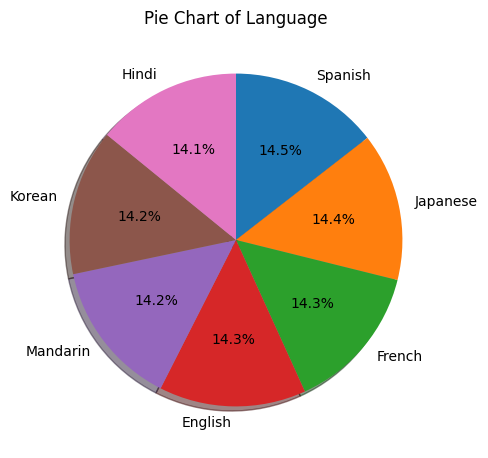

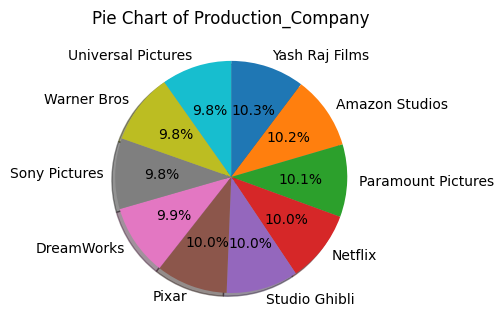

In [ ]:

# Select the categorical columns for plotting
categorical_cols = ['Language', 'Production_Company']

# Generate a pie chart for each categorical column
for col in categorical_cols:
    plt.figure(figsize=(5, 5))
    movies[col].value_counts().plot.pie(
        autopct='%1.1f%%',
        startangle=90,
        shadow=True,
        counterclock=False
    )
    plt.title(f'Pie Chart of {col}')
    plt.ylabel('')  # Hide y-label
    plt.tight_layout()
    plt.show()

# Data Preprocessing

In [ ]:
tfidf = TfidfVectorizer(max_features=1000, ngram_range=(1, 2), stop_words='english')
X_text = tfidf.fit_transform(movies["Description"])

In [ ]:
import pandas as pd

# Convert sparse matrix to DataFrame
tfidf_df = pd.DataFrame(X_text.toarray(), columns=tfidf.get_feature_names_out())

# Now use .head()
tfidf_df.head()

,action,action scenes,characters,chilling,chilling tale,comedy,comedy guarantees,complex,complex characters,dread,...,thriller,thriller intense,touching,touching love,twists,unexpected,unexpected twists,wonder,world,world filled
0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.333333,0.333333,0.0,0.0,0.0,0.000000,0.000000,0.000000
1,0.301511,0.301511,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.301511,0.301511,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
2,0.301511,0.301511,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.301511,0.301511,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.333333,0.0,0.0,0.0,0.0,0.333333,0.333333,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.341297,0.341297,0.341297


In [ ]:
# One-Hot Encoding for categorical columns
onehot = OneHotEncoder(handle_unknown='ignore')
X_cat = onehot.fit_transform(movies[["Director", "Production_Company", "Lead_Actor", "Content_Rating", "Language", "Country"]])
onehot_df = pd.DataFrame(X_cat.toarray(), columns=onehot.get_feature_names_out())
onehot_df.head()

,Director_A. Khan,Director_D. Patel,Director_J. Smith,Director_L. Zhang,Director_M. Brown,Director_N. Roy,Director_P. Adams,Director_R. Lee,Director_S. Chen,Director_T. Johnson,...,Language_Korean,Language_Mandarin,Language_Spanish,Country_China,Country_France,Country_India,Country_Japan,Country_South Korea,Country_UK,Country_USA
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# Numerical columns
X_num = movies[['Year', 'Duration', 'Rating', 'Votes', 'Budget_USD', 'BoxOffice_USD', 'Num_Awards', 'Critic_Reviews']].values

In [ ]:
X_text.shape

(50000, 66)

In [ ]:
X_cat.shape

(50000, 49)

In [ ]:
X_num.shape

(50000, 8)

In [ ]:
from scipy.sparse import hstack
from scipy import sparse

X_num_sparse = sparse.csr_matrix(X_num)  # convert dense to sparse
X = hstack([X_text, X_cat, X_num_sparse])

In [ ]:
# Combine all features
X = hstack([X_text, X_cat, X_num])
X

<COOrdinate sparse matrix of dtype 'float64'
	with 1176251 stored elements and shape (50000, 123)>

In [ ]:
# Encode target
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(movies["Genre"])
y

array([5, 0, 0, ..., 1, 4, 3])

In [ ]:
y

array([5, 0, 0, ..., 1, 4, 3])

# Splitting and Scaling

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(40000, 123)
(10000, 123)
(40000,)
(10000,)


In [ ]:
from sklearn.preprocessing import MaxAbsScaler #For no Outlayers

scaler =  MaxAbsScaler()
x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled =scaler.transform(X_test)
X_train[0:10]

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 232 stored elements and shape (10, 123)>

# Logistic Regression Model

In [ ]:
# Train Logistic Regression
model_lr= LogisticRegression(fit_intercept=True,max_iter=10000)
model_lr.fit(x_train_scaled, y_train)

LogisticRegression(max_iter=10000)

In [ ]:
model_lr.coef_#(Constants of independent variable )

array([[ 7.73527295e-01,  7.73527295e-01, -1.41240948e-01,
        -1.09313410e-01, -1.09313410e-01, -1.41375722e-01,
        -1.41375722e-01, -1.41240948e-01, -1.41240948e-01,
        -1.09313410e-01, -1.41240948e-01, -1.41240948e-01,
        -1.09313410e-01, -1.09313410e-01, -1.41240948e-01,
        -1.41240948e-01,  7.73527295e-01,  7.73527295e-01,
        -1.09313410e-01, -1.09313410e-01, -2.65549465e-01,
        -1.32456513e-01, -1.33198812e-01, -1.41375722e-01,
        -1.41375722e-01, -1.41375722e-01, -1.41375722e-01,
        -1.41243782e-01, -1.41243782e-01, -1.32456513e-01,
        -1.32456513e-01,  7.73527295e-01,  7.73527295e-01,
        -1.41240948e-01, -1.41240948e-01, -1.41375722e-01,
        -1.41375722e-01, -1.41375722e-01, -1.41243782e-01,
        -1.41243782e-01, -1.32456513e-01, -1.32456513e-01,
        -1.41243782e-01,  7.73527295e-01,  7.73527295e-01,
        -1.33198812e-01, -1.33198812e-01,  7.73527295e-01,
        -1.09313410e-01, -1.09313410e-01, -1.41243782e-0

In [ ]:
model_lr.intercept_# (For the Constants of the relation)

array([-0.02688488,  0.0176615 ,  0.01991098, -0.0066988 , -0.03258534,
        0.01988029,  0.00871625])

In [ ]:
train_pred_class= model_lr.predict(X_train)
test_pred_class =model_lr.predict(X_test)
print(train_pred_class[:10])
test_pred_class[:10]

[2 5 2 2 2 5 5 2 2 2]


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
from sklearn.metrics import recall_score,precision_score,f1_score

In [ ]:
#premormance metrics for logistics regression model
train_accuracy = accuracy_score(train_pred_class,y_train)
test_accuracy =accuracy_score(test_pred_class , y_test)
train_recall= recall_score(y_train,train_pred_class, average='weighted')
test_recall=recall_score(y_test,test_pred_class, average='weighted')
train_precision= precision_score(y_train,train_pred_class, average='weighted')
test_precision= precision_score(y_test,test_pred_class, average='weighted')
train_F_1 =f1_score(y_train,train_pred_class, average='weighted')
test_f_1 = f1_score(y_test,test_pred_class, average='weighted')

print("train_accuracy",train_accuracy)
print("test_accuracy",test_accuracy,"\n") # not properly Learning pattern
print("train_recall",train_recall)
print("test_recall",test_recall,"\n") # Not properly Genrelize
print("train_precision",train_precision)
print("test_precision)",test_precision,"\n") #
print("train_F_1",train_F_1)
print("test_f_1",test_f_1,"\n")


train_accuracy 0.14485
test_accuracy 0.1447 

train_recall 0.14485
test_recall 0.1447 

train_precision 0.04225324014137827
test_precision) 0.03996773711902578 

train_F_1 0.05562294619371925
test_f_1 0.053927108002207264 



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(criterion='entropy',max_depth=10,random_state = 0)
decision_tree.fit(x_train_scaled,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=0)

In [ ]:
train_pred_class_decision= decision_tree.predict(X_train)
test_pred_class_decision = decision_tree.predict(X_test)
train_pred_class_decision[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
from sklearn.metrics import confusion_matrix
decision_tree_train_cm = confusion_matrix(y_train,train_pred_class_decision)
print(decision_tree_train_cm)

[[   0 5708    0    0    0    0    0]
 [   0 5612    0    0    0    0    0]
 [   0 5739    0    0    0    0    0]
 [   0 5670    0    0    0    0    0]
 [   0 5775    0    0    0    0    0]
 [   0 5740    0    0    0    0    0]
 [   0 5756    0    0    0    0    0]]


In [ ]:
decision_tree_test_cm = confusion_matrix(y_test,test_pred_class_decision)
print(decision_tree_test_cm)

[[   0 1399    0    0    0    0    0]
 [   0 1447    0    0    0    0    0]
 [   0 1448    0    0    0    0    0]
 [   0 1430    0    0    0    0    0]
 [   0 1485    0    0    0    0    0]
 [   0 1429    0    0    0    0    0]
 [   0 1362    0    0    0    0    0]]


In [ ]:
#preformance metrics for decision tree model
decision_train_accuracy = accuracy_score(y_train,train_pred_class_decision)
decision_test_accuracy = accuracy_score(y_test,test_pred_class_decision)
decision_train_precision = precision_score(y_train,train_pred_class_decision, average='weighted')
decision_test_precision = precision_score(y_test,test_pred_class_decision, average='weighted')
decision_train_reacll = recall_score(y_train,train_pred_class_decision, average='weighted')
decision_test_recall = recall_score(y_test,test_pred_class_decision, average='weighted')
decision_train_f1 = f1_score(y_train,train_pred_class_decision, average='weighted')
decision_test_f1 = f1_score(y_test,test_pred_class_decision, average='weighted')


print("decision_train_accuracy",decision_train_accuracy)
print("decision_test_accuracy",decision_test_accuracy,"\n")
print("decision_train_precision",decision_train_precision)
print("decision_test_precision",decision_test_precision,"\n")
print("decision_train_reacll",decision_train_reacll)
print("decision_test_recall",decision_test_recall,"\n")
print("decision_train_f1",decision_train_f1)
print("decision_test_f1",decision_test_f1,"\n")

decision_train_accuracy 0.1403
decision_test_accuracy 0.1447 

decision_train_precision 0.01968409
decision_test_precision 0.02093809 

decision_train_reacll 0.1403
decision_test_recall 0.1447 

decision_train_f1 0.03452440585810752
decision_test_f1 0.03658266794793395 



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Random forest Model

In [ ]:
#training of random forest model
random_forest = RandomForestClassifier(max_depth=20, n_estimators=100, random_state=42)
random_forest.fit(X_train,y_train)

RandomForestClassifier(max_depth=20, random_state=42)

In [ ]:
forest_train_pred_class = random_forest.predict(X_train)
forest_test_pred_class = random_forest.predict(X_test)
forest_train_pred_class

array([1, 1, 3, ..., 1, 2, 3])

In [ ]:
forest_train_cm = confusion_matrix(y_train,forest_train_pred_class)
print(forest_train_cm)

[[5708    0    0    0    0    0    0]
 [   0 5612    0    0    0    0    0]
 [   0    0 5739    0    0    0    0]
 [   0    0    0 5670    0    0    0]
 [   0    0    0    0 5775    0    0]
 [   0    0    0    0    0 5740    0]
 [   0    0    0    0    0    0 5756]]


In [ ]:
forest_test_cm = confusion_matrix(y_test,forest_test_pred_class)
print(forest_test_cm)

[[1399    0    0    0    0    0    0]
 [   0 1447    0    0    0    0    0]
 [   0    0 1448    0    0    0    0]
 [   0    0    0 1430    0    0    0]
 [   0    0    0    0 1485    0    0]
 [   0    0    0    0    0 1429    0]
 [   0    0    0    0    0    0 1362]]


In [ ]:
#performance metrics for random forest model
forest_train_accuracy = accuracy_score(y_train,forest_train_pred_class)
forest_test_accuracy = accuracy_score(y_test,forest_test_pred_class)
forest_train_precision = precision_score(y_train,forest_train_pred_class, average='weighted')
forest_test_precision = precision_score(y_test,forest_test_pred_class, average='weighted')
forest_train_recall = recall_score(y_train,forest_train_pred_class, average='weighted')
forest_test_recall = recall_score(y_test,forest_test_pred_class, average='weighted')
forest_train_f1 = f1_score(y_train,forest_train_pred_class, average='weighted')
forest_test_f1 = f1_score(y_test,forest_test_pred_class, average='weighted')


print("forest_train_accuracy",forest_train_accuracy)
print("forest_test_accuracy",forest_test_accuracy,"\n")
print("forest_train_precision",forest_train_precision)
print("forest_test_precision",forest_test_precision,"\n")
print("forest_train_recall",forest_train_recall)
print("forest_test_recall",forest_test_recall,"\n")
print("forest_train_f1",forest_train_f1)
print("forest_test_f1",forest_test_f1,"\n")

forest_train_accuracy 1.0
forest_test_accuracy 1.0 

forest_train_precision 1.0
forest_test_precision 1.0 

forest_train_recall 1.0
forest_test_recall 1.0 

forest_train_f1 1.0
forest_test_f1 1.0 



# Comparing Performance metrices

In [ ]:
# comparing accuracy score for train
print("COMPARING ACCURACY","\n")
print(train_accuracy)
print(decision_train_accuracy)
print(forest_train_accuracy ,"\n")
# for test
print(test_accuracy)
print(decision_test_accuracy)
print(forest_test_accuracy,"\n","\n")



# comparing precision score for train
print("COMPARING PRECISION","\n")
print(train_precision)
print(decision_train_precision)
print(forest_train_precision,"\n")
# for test
print(test_precision)
print(decision_test_precision)
print(forest_test_precision,"\n","\n")




#comparing recall score for train
print("COMPARING RECALL","\n")
print(train_recall)
print(decision_train_reacll)
print(forest_train_recall,"\n")
# for test
print(test_recall)
print(decision_test_recall)
print(forest_test_recall,"\n","\n")



#comparing f1 score for train
print("COMPARING F1 SCORE","\n")
print(train_F_1)
print(decision_train_f1)
print(forest_train_f1,"\n")
# for test
print(test_f_1)
print(decision_test_f1)
print(forest_test_f1)


COMPARING ACCURACY 

0.14485
0.1403
1.0 

0.1447
0.1447
1.0 
 

COMPARING PRECISION 

0.04225324014137827
0.01968409
1.0 

0.03996773711902578
0.02093809
1.0 
 

COMPARING RECALL 

0.14485
0.1403
1.0 

0.1447
0.1447
1.0 
 

COMPARING F1 SCORE 

0.05562294619371925
0.03452440585810752
1.0 

0.053927108002207264
0.03658266794793395
1.0


In [ ]:
# Save everything after training
import pickle

pickle.dump(tfidf, open("tfidf.pkl", "wb"))
pickle.dump(onehot, open("onehot.pkl", "wb"))
pickle.dump(scaler, open("scaler.pkl", "wb"))
pickle.dump(label_encoder, open("label_encoder.pkl", "wb"))
pickle.dump(model_lr, open("model_lr.pkl", "wb"))  # or any other model you're using


In [ ]:
from scipy.sparse import hstack
from scipy import sparse

def preprocess_input(input_df):
    # Load the preprocessing tools
    tfidf = pickle.load(open("tfidf.pkl", "rb"))
    onehot = pickle.load(open("onehot.pkl", "rb"))
    scaler = pickle.load(open("scaler.pkl", "rb"))

    # Text: TF-IDF
    X_text = tfidf.transform(input_df["Description"])

    # Categorical: OneHotEncoding
    cat_features = ["Director", "Production_Company", "Lead_Actor", "Content_Rating", "Language", "Country"]
    X_cat = onehot.transform(input_df[cat_features])

    # Numeric features
    num_features = ["Year", "Duration", "Rating", "Votes", "Budget_USD", "BoxOffice_USD", "Num_Awards", "Critic_Reviews"]
    X_num = input_df[num_features].values
    X_num_sparse = sparse.csr_matrix(X_num)

    # Combine and scale
    X_combined = hstack([X_text, X_cat, X_num_sparse])
    X_scaled = scaler.transform(X_combined)

    return X_scaled


In [ ]:
def predict_genre(new_data):
    model = pickle.load(open("model_lr.pkl", "rb"))
    label_encoder = pickle.load(open("label_encoder.pkl", "rb"))

    # Preprocess input
    processed_input = preprocess_input(new_data)

    # Predict
    prediction = model.predict(processed_input)

    # Convert label
    predicted_label = label_encoder.inverse_transform(prediction)

    return predicted_label[0]  # return genre as string (fixed index)

In [ ]:
new_movie = pd.DataFrame([{
    "Description": "A hopeless romantic finds himself in hilarious situations while searching for true love in a busy city.",
    "Director": "Nora Ephron",
    "Production_Company": "Universal Pictures",
    "Lead_Actor": "Hugh Grant",
    "Content_Rating": "PG",
    "Language": "English",
    "Country": "USA",
    "Year": 2004,
    "Duration": 110,
    "Rating": 6.7,
    "Votes": 85000,
    "Budget_USD": 30000000,
    "BoxOffice_USD": 95000000,
    "Num_Awards": 2,
    "Critic_Reviews": 130
}])
genre = predict_genre(new_movie)
print("Predicted Genre:", genre)


Predicted Genre: Romance


In [ ]:
new_movie = pd.DataFrame([{
    "Description": "A brilliant detective races against time to stop a series of mysterious murders that follow a cryptic pattern.",
    "Director": "David Fincher",
    "Production_Company": "Paramount Pictures",
    "Lead_Actor": "Jake Gyllenhaal",
    "Content_Rating": "R",
    "Language": "English",
    "Country": "USA",
    "Year": 2007,
    "Duration": 142,
    "Rating": 7.9,
    "Votes": 340000,
    "Budget_USD": 65000000,
    "BoxOffice_USD": 130000000,
    "Num_Awards": 6,
    "Critic_Reviews": 410
}])
genre = predict_genre(new_movie)
print("Predicted Genre:", genre)


Predicted Genre: Drama


<Axes: xlabel='Genre', ylabel='count'>

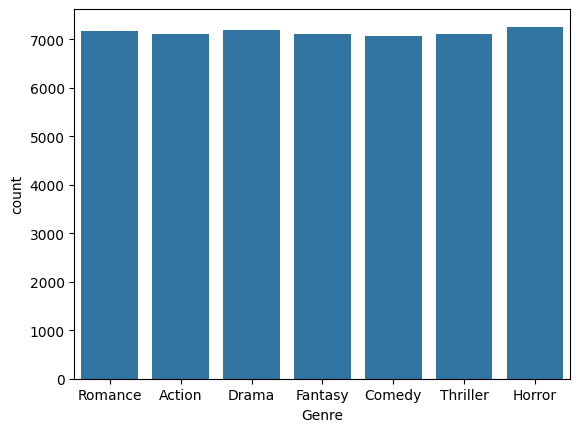

In [ ]:
import seaborn as sns
sns.countplot(x=movies["Genre"])